Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   iyear  imonth  iday  counts
0   2000       1     0       2
1   2000       1     1      28
2   2000       1     2       4
3   2000       1     3      10
4   2000       1     4       6
HERES THE RESULT {'Monday': 2549, 'Tuesday': 2383, 'Wednesday': 2384, 'Thursday': 2356, 'Friday': 2131, 'Saturday': 2172, 'Sunday': 2354}


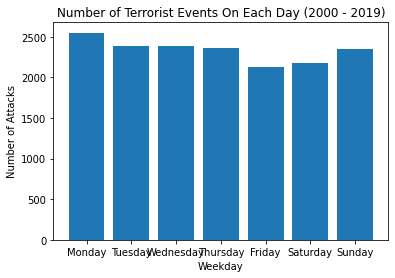

In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')




week_days_lookup = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

week_days= {"Monday" : 0,"Tuesday" :0 ,"Wednesday": 0,"Thursday": 0,"Friday": 0 ,"Saturday": 0 ,"Sunday": 0 }


terrordata = pd.read_csv(
   '/content/GDT_2000_2019.csv')


def countWeekdays(year, month, day,counts):
    try:
        weekday=week_days_lookup[datetime.date(year,month,day).weekday()]
        week_days[weekday] = week_days[weekday] + counts
    except:
        pass


collect_dates = terrordata.groupby(['iyear','imonth','iday']).size().reset_index(name='counts')

result = [countWeekdays(row[0],row[1],row[2],row[3]) for row in collect_dates[['iyear','imonth','iday','counts']].to_numpy()]

print(collect_dates.head())
    
print("HERES THE RESULT",week_days)

plt.bar(week_days.keys(), week_days.values())
plt.title('Number of Terrorist Events On Each Day (2000 - 2019)')
plt.xlabel('Weekday')
plt.ylabel('Number of Attacks')
plt.show()


